In [66]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

In [2]:
data=pd .read_csv('F:/jupyterwork/train.csv')
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [3]:
title_map={"Capt":"Officer",
           "Col":"Officer",
           "Major":"Officer",
           "Johkheer":"Royalty",
           "Don":"Royalty",
           "Sir":"Royalty",
           "Dr":"Royalty",
           "Rev":"Officer",
           "The Countess":"Royalty",
           "Dona":"Royalty",
           "Mme":"Mrs",
           "Mlle":"Miss",
           "Ms":"Mrs",
           "Mr":"Mr",
           "Mrs":"Mrs",
           "Miss":"Miss",
           "Master":"Master",
           "Lady":"Officer"}
data["Title"]=data.Title.map(title_map)

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [5]:
data["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     12
Royalty      9
Name: Title, dtype: int64

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [7]:
def passenger_type (row):
    if row['Age']<2:
        return 'Infant'
    elif (row['Age']>=2 and row['Age']<12):
        return 'Child'
    elif (row['Age']>=12 and row['Age']<18):
        return 'Youth'
    elif (row['Age']>=18 and row['Age']<65):
        return 'Adult'
    elif row['Age']>=65:
        return 'Senior'
    elif row['Title']>='Master':
        return 'Adult'
    elif row['Title']>='Miss':
        return 'Youth'
    elif row['Title']>='Mr' or row['Title']=='Mrs':
        return 'Adult'
    else:
        return 'Unknown'

In [8]:
data['PassengerType']=data.apply(lambda row: passenger_type(row),axis=1)

In [9]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [10]:
data["PassengerType"].value_counts()

Adult     767
Child      54
Youth      45
Infant     14
Senior     11
Name: PassengerType, dtype: int64

In [11]:
sex_map={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [12]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [13]:
passengertype_map={"Unknown":0,"Infant":1,"Child":2,"Youth":3,"Adult":4,"Senior":5}
data["PassengerType"]=data["PassengerType"].map(passengertype_map)

In [14]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [15]:
kolom = ['Name', 'Age']
data1 = pd.read_csv('F:/jupyterwork/train.csv', usecols=kolom, nrows=12)
data1.insert(value=data1.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=2,column="Title")
data1["Title"]=data1.Title.map(title_map)
data1['PassengerType']=data1.apply(lambda row: passenger_type(row),axis=1)
data1.head()

,Name,Age,Title,PassengerType
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult
4,"Allen, Mr. William Henry",35.0,Mr,Adult


In [16]:
#Nominal
nominal = pd.get_dummies(data1['Name'])
nominal.head(5)

,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [17]:
data2 = pd.concat([data1, nominal], axis='columns')
data2

,Name,Age,Title,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,"Allen, Mr. William Henry",35.0,Mr,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,"Moran, Mr. James",NaN,Mr,Adult,0,0,0,0,0,0,0,0,1,0,0,0
6,"McCarthy, Mr. Timothy J",54.0,Mr,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,"Palsson, Master. Gosta Leonard",2.0,Master,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Mrs,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Mrs,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
data2.drop(columns=["Name","Age","Title"], inplace=True)
data2

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,Adult,0,0,0,0,0,0,0,0,1,0,0,0
6,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
#Ordinal
data2['PassengerType'].replace(passengertype_map, inplace=True)
data2

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,4,0,0,1,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,1,0,0,0
6,4,0,0,0,0,0,0,0,1,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,0,1,0
8,4,0,0,0,0,0,0,1,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
def titanic_corr(data):
  correlation=data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [21]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.010215
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.146584
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.131452
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.096673
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.672077
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.345670
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.358976
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.002842
PassengerType,0.010215,-0.146584,-0.131452,0.096673,0.672077,-0.345670,-0.358976,0.002842,1.000000


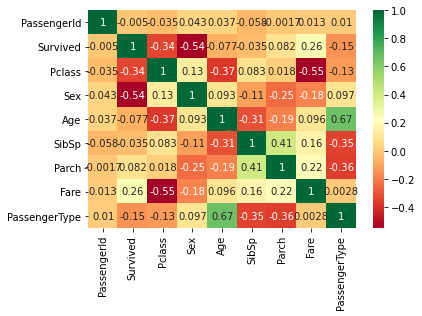

In [22]:
titanic_corr(data)

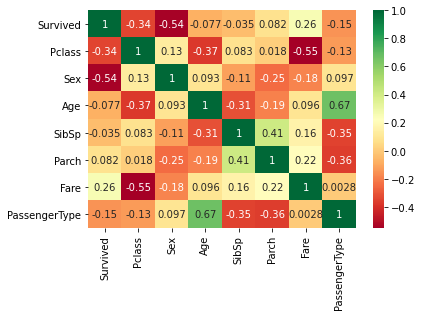

In [23]:
data.drop(["PassengerId"], inplace=True, axis=1)
titanic_corr(data)

In [24]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


In [25]:
data.drop(["Embarked","Cabin","Ticket","Age","Name"], inplace=True, axis=1)
data.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,Mr,4
1,1,1,0,1,0,71.2833,Mrs,4
2,1,3,0,0,0,7.9250,Miss,4
3,1,1,0,1,0,53.1000,Mrs,4
4,0,3,1,0,0,8.0500,Mr,4


In [26]:
def title_type (row):
    if row['Title']=='Mrs' or row['Title']=='Miss':
        return 1
    elif row['Title']=='Mr':
        return 2
    elif row['Title']=='Officer':
        return 3
    elif row['Title']=='Master':
        return 4
    elif row['Title']=='Royalty':
        return 5
    else:
        return 0

In [27]:
data['Title']=data.apply(lambda row: title_type(row),axis=1)
data.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,2,4
1,1,1,0,1,0,71.2833,1,4
2,1,3,0,0,0,7.9250,1,4
3,1,1,0,1,0,53.1000,1,4
4,0,3,1,0,0,8.0500,2,4


In [28]:
#Inisiasi data 

xdata = data.drop('Survived',axis=1)
ydata = data.Survived

xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.3,random_state=1)

In [29]:
#Menjalankan fungsi algoritma Decision Tree

clf=DecisionTreeClassifier()
clf=clf.fit(xtrain,ytrain)

In [30]:
#Menampilkan hasil prediksi dari fungsi yang telah dijalankan

ypred_data = clf.predict(xtest)
ypred_data

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [31]:
#Inisiasi fungsi klasifikasi Naive Bayes

modelnaivbays = GaussianNB()

In [32]:
#Memasukkan data yang telah diolah sebelumnya 

naivbaystrain = modelnaivbays.fit(xtrain, ytrain)
naivbaystrain.class_count_

array([396., 227.])

In [33]:
##Menampilkan hasil prediksi dari fungsi yang telah dijalankan

ypred_naivbays = naivbaystrain.predict(xtest)
ypred_naivbays

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [34]:
print(classification_report(ytest, ypred_naivbays))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       153
           1       0.74      0.67      0.70       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [35]:
#Algoritma Support Vector Machine

#Import fungsi klasifikasi algortima Support Vector Machine

from sklearn import svm


#Membuat variabel untuk fungsi klasifikasi algoritma Support Vector Machine

clf = svm.SVC(kernel='linear') # Linear Kernel


#Menjalankan fungsi yang sudah dibuat sebelumnya

clf.fit(xtrain, ytrain)


#Menjalankan perintah testing prediksi 

ypred_svm = clf.predict(xtest)

In [36]:
#Menampilkan presentase nilai akurasi dari data yang telah prediksi

print(classification_report(ytest, ypred_svm))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       153
           1       0.77      0.66      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Title          891 non-null    int64  
 7   PassengerType  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


# EVALUASI KLASIFIKASI

In [38]:
#Bagian 1 - Jenis Pembagian Data Hold-Out

from sklearn.neighbors import KNeighborsClassifier 

In [39]:
KNN = KNeighborsClassifier().fit(xtrain, ytrain)
KNN

KNeighborsClassifier()

In [40]:
KNN_pred = KNN.predict(xtest)
KNN_pred 

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1], dtype=int64)

In [41]:
#cara1 
print(confusion_matrix(ytest, KNN_pred))

[[128  25]
 [ 38  77]]


In [42]:
#cara2

pd.crosstab(ytest, KNN_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,128,25,153
1,38,77,115
All,166,102,268


In [43]:
print(classification_report(ytest, KNN_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       153
           1       0.75      0.67      0.71       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268



In [44]:
#Evaluasi Model - ROC AUC 

from sklearn.metrics import roc_auc_score, roc_curve 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

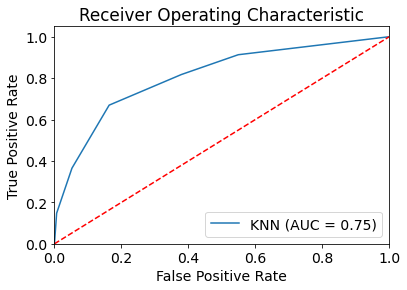

In [45]:
#Hitung FPR, TPR, dan nilai AUC

KNN_roc_auc = roc_auc_score(ytest, KNN.predict(xtest))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, KNN.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label = 'KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

catatan: FPR (false positive rate), TPR (True Positive Rate), AUC (Area Under Curve)

In [46]:
#Bagian 2 - Jenis Pembagian Data Cross-Val 

from sklearn.model_selection import cross_val_score 

In [47]:
KNN = KNeighborsClassifier()

In [48]:
#Memecah Data Menggunakan Metode Cross Validation Dengan k = 5, Sekaligus Hitung Score Akurasinya

scores_accuracy = cross_val_score(KNN, xdata, ydata, cv=5, scoring='accuracy')
print(scores_accuracy)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

[0.75977654 0.73033708 0.83707865 0.78089888 0.76966292]
Rata-rata nilai akurasi: 0.78 (+/- 0.04)


In [49]:
#Menghitung Score Precision Macro

scores_precision = cross_val_score(KNN, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

[0.74814768 0.71426585 0.82641879 0.77204102 0.76235632]
Rata-rata nilai precision macro: 0.76 (+/- 0.04)


In [50]:
#Menghitung Score Recall Macro

scores_recall = cross_val_score(KNN, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

[0.75592885 0.70601604 0.83449198 0.75534759 0.74278686]
Rata-rata nilai recall macro: 0.76 (+/- 0.04)


In [51]:
#Menghitung F1 Score

scores_f1 = cross_val_score(KNN, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.75078517 0.70918993 0.82972126 0.76130385 0.74906303]
Rata-rata nilai f1 macro: 0.76 (+/- 0.04)


# TUGAS MAHASISWA 1

In [52]:
# GaussianNaiveBeyes
gnb = GaussianNB()
gnb = gnb.fit(xtrain, ytrain)
ypredgnb = gnb.predict(xtest)
print("Akurasi Gaussian Naive Beyes : ", metrics.accuracy_score(ytest, ypredgnb)*100)

Akurasi Gaussian Naive Beyes :  75.74626865671642


GNB
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       153
           1       0.74      0.67      0.70       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



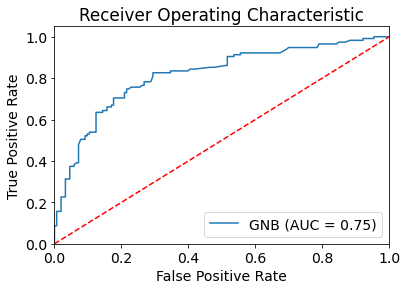

In [53]:
#Algoritma Naive Bayes 

print("GNB")
print(classification_report(ytest, ypred_naivbays))

modelnaivbays_roc_auc = roc_auc_score(ytest, modelnaivbays.predict(xtest))
modelnaivbays_fpr, modelnaivbays_tpr, modelnaivbays_thresholds = roc_curve(ytest, modelnaivbays.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(modelnaivbays_fpr, modelnaivbays_tpr, label = 'GNB (AUC = %0.2f)' % modelnaivbays_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [54]:
# Linear Discriminant Analysis

lda = LDA()
lda = lda.fit(xtrain, ytrain)
ypredlda = lda.predict(xtest)
print("Akurasi Linear Discriminant Analysis : ", metrics.accuracy_score(ytest, ypredlda)*100)

Akurasi Linear Discriminant Analysis :  77.98507462686567


LDA
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       153
           1       0.77      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



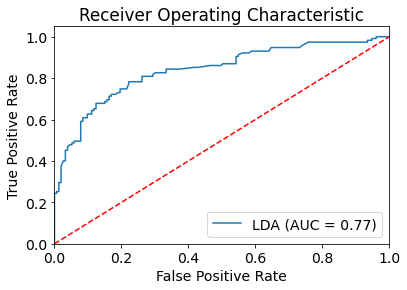

In [55]:
print("LDA")
print(classification_report(ytest, ypredlda))
lda_roc_auc = roc_auc_score(ytest, lda.predict(xtest))
lda_fpr, lda_tpr, lda_thresholds = roc_curve(ytest, lda.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(lda_fpr, lda_tpr, label = 'LDA (AUC = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

# TUGAS MAHASISWA 2


In [56]:
#Algoritma Naive Bayes

scores_accuracy_modelnaivbays = cross_val_score(modelnaivbays, xdata, ydata, cv=10, scoring='accuracy')
# print(scores_accuracy_gnb)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_modelnaivbays.mean(), scores_accuracy_modelnaivbays.std()))

scores_precision_modelnaivbays = cross_val_score(modelnaivbays, xdata, ydata, cv=10, scoring='precision_macro')
# print(scores_precision_gnb)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_modelnaivbays.mean(), scores_precision_modelnaivbays.std()))

scores_recall_modelnaivbays = cross_val_score(modelnaivbays, xdata, ydata, cv=10, scoring='recall_macro')
# print(scores_recall_gnb)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_modelnaivbays.mean(), scores_recall_modelnaivbays.std()))

scores_f1_modelnaivbays = cross_val_score(modelnaivbays, xdata, ydata, cv=10, scoring='f1_macro')
# print(scores_f1_gnb)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_modelnaivbays.mean(), scores_f1_modelnaivbays.std()))

Rata-rata nilai akurasi: 0.80 (+/- 0.03)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)


In [57]:
#Algoritma Linear Discriminant Analysis

scores_accuracy_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_lda.mean(), scores_accuracy_lda.std()))

scores_precision_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_lda.mean(), scores_precision_lda.std()))

scores_recall_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_lda.mean(), scores_recall_lda.std()))

scores_f1_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_lda.mean(), scores_f1_lda.std()))

Rata-rata nilai akurasi: 0.81 (+/- 0.03)
Rata-rata nilai precision macro: 0.80 (+/- 0.03)
Rata-rata nilai recall macro: 0.80 (+/- 0.04)
Rata-rata nilai f1 macro: 0.80 (+/- 0.04)


In [58]:
data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,2,4
1,1,1,0,1,0,71.2833,1,4
2,1,3,0,0,0,7.9250,1,4
3,1,1,0,1,0,53.1000,1,4
4,0,3,1,0,0,8.0500,2,4
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,3,4
887,1,1,0,0,0,30.0000,1,4
888,0,3,0,1,2,23.4500,1,4
889,1,1,1,0,0,30.0000,2,4


In [59]:
xdata = data.drop('Survived', axis = 1)
ydata = data.Survived

In [60]:
clf = DecisionTreeClassifier()
gnb = GaussianNB()
lda = LDA()
KNN = KNeighborsClassifier()

In [61]:
xtrain, xtest, ytrain, ytest, = train_test_split(xdata, ydata, test_size = 0.3, random_state = 1)

In [62]:
CLF_pred = clf.fit(xtrain, ytrain).predict(xtest)
GNB_pred = gnb.fit(xtrain, ytrain).predict(xtest)
LDA_pred = lda.fit(xtrain, ytrain).predict(xtest)
KNN_pred = KNN.fit(xtrain, ytrain).predict(xtest)

In [63]:
#holdout Stats

print("CLF")
ypredclf = clf.fit(xtrain, ytrain).predict(xtest)
print("Akurasi CLF Tree : ", metrics.accuracy_score(ytest, ypredclf)*100)

print("\nGaussianNaiveBeyes")
ypredgnb = gnb.fit(xtrain, ytrain).predict(xtest)
print("Akurasi Gaussian Naive Beyes : ", metrics.accuracy_score(ytest, ypredgnb)*100)

print("\nLDA")
lda = lda.fit(xtrain, ytrain)
ypredlda = lda.fit(xtrain, ytrain).predict(xtest)
print("Akurasi LDA Tree : ", metrics.accuracy_score(ytest, ypredlda)*100)

print("\nKNN")
ypredknn = KNN.fit(xtrain, ytrain).predict(xtest)
print("Akurasi KNN Tree : ", metrics.accuracy_score(ytest, ypredknn)*100)

CLF
Akurasi CLF Tree :  76.11940298507463

GaussianNaiveBeyes
Akurasi Gaussian Naive Beyes :  75.74626865671642

LDA
Akurasi LDA Tree :  77.98507462686567

KNN
Akurasi KNN Tree :  76.49253731343283


In [72]:
#Confussion Matrix
print("CLF")
print(pd.crosstab(ytest, CLF_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print("")
print("GNB")
print(pd.crosstab(ytest, GNB_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print("")
print("LDA")
print(pd.crosstab(ytest, LDA_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print("")
print("KNN")
print(pd.crosstab(ytest, KNN_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))

CLF
Predicted    0   1  All
Actual                 
0          131  22  153
1           42  73  115
All        173  95  268

GNB
Predicted    0    1  All
Actual                  
0          126   27  153
1           38   77  115
All        164  104  268

LDA
Predicted    0    1  All
Actual                  
0          130   23  153
1           36   79  115
All        166  102  268

KNN
Predicted    0    1  All
Actual                  
0          128   25  153
1           38   77  115
All        166  102  268


In [65]:
print("CLF")
print(classification_report(ytest, CLF_pred))
print("\nGNB")
print(classification_report(ytest, GNB_pred))
print("\nLDA")
print(classification_report(ytest, LDA_pred))
print("\nKNN")
print(classification_report(ytest, KNN_pred))

CLF
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       153
           1       0.77      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


GNB
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       153
           1       0.74      0.67      0.70       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


LDA
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       153
           1       0.77      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268


KNN


In [67]:
print("CLF")
print("accuracy: ", accuracy_score(ytest, CLF_pred))
print("precision: ", precision_score(ytest, CLF_pred))
print("recall: ", recall_score(ytest, CLF_pred))
print("\nGNB")
print("accuracy: ", accuracy_score(ytest, GNB_pred))
print("precision: ", precision_score(ytest, GNB_pred))
print("recall: ", recall_score(ytest, GNB_pred))
print("\nLDA")
print("accuracy: ", accuracy_score(ytest, LDA_pred))
print("precision: ", precision_score(ytest, LDA_pred))
print("recall: ", recall_score(ytest, LDA_pred))
print("\nKNN")
print("accuracy: ", accuracy_score(ytest, KNN_pred))
print("precision: ", precision_score(ytest, KNN_pred))
print("recall: ", recall_score(ytest, KNN_pred))

CLF
accuracy:  0.7611940298507462
precision:  0.7684210526315789
recall:  0.6347826086956522

GNB
accuracy:  0.7574626865671642
precision:  0.7403846153846154
recall:  0.6695652173913044

LDA
accuracy:  0.7798507462686567
precision:  0.7745098039215687
recall:  0.6869565217391305

KNN
accuracy:  0.7649253731343284
precision:  0.7549019607843137
recall:  0.6695652173913044


In [68]:
#CLF
print("CLF")
scores_accuracy_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_clf.mean(), scores_accuracy_clf.std()))

scores_precision_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_clf.mean(), scores_precision_clf.std()))

scores_recall_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_clf.mean(), scores_recall_clf.std()))

scores_f1_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_clf.mean(), scores_f1_clf.std()))

#GNB
print("\nGNB")
scores_accuracy_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_gnb.mean(), scores_accuracy_gnb.std()))

scores_precision_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_gnb.mean(), scores_precision_gnb.std()))

scores_recall_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_gnb.mean(), scores_recall_gnb.std()))

scores_f1_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_gnb.mean(), scores_f1_gnb.std()))

#LDA
print("\nLDA")
scores_accuracy_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_lda.mean(), scores_accuracy_lda.std()))

scores_precision_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_lda.mean(), scores_precision_lda.std()))

scores_recall_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_lda.mean(), scores_recall_lda.std()))

scores_f1_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_lda.mean(), scores_f1_lda.std()))

#KNN
print("\nKNN")
scores_accuracy_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN.mean(), scores_accuracy_KNN.std()))

scores_precision_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_KNN.mean(), scores_precision_KNN.std()))

scores_recall_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_KNN.mean(), scores_recall_KNN.std()))

scores_f1_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_KNN.mean(), scores_f1_KNN.std()))

CLF
Rata-rata nilai akurasi: 0.82 (+/- 0.03)
Rata-rata nilai precision macro: 0.81 (+/- 0.04)
Rata-rata nilai recall macro: 0.80 (+/- 0.05)
Rata-rata nilai f1 macro: 0.80 (+/- 0.04)

GNB
Rata-rata nilai akurasi: 0.80 (+/- 0.03)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)

LDA
Rata-rata nilai akurasi: 0.81 (+/- 0.03)
Rata-rata nilai precision macro: 0.80 (+/- 0.03)
Rata-rata nilai recall macro: 0.80 (+/- 0.04)
Rata-rata nilai f1 macro: 0.80 (+/- 0.04)

KNN
Rata-rata nilai akurasi: 0.77 (+/- 0.04)
Rata-rata nilai precision macro: 0.76 (+/- 0.04)
Rata-rata nilai recall macro: 0.76 (+/- 0.05)
Rata-rata nilai f1 macro: 0.76 (+/- 0.05)


In [69]:
#CLF
print("CLF")
scores_accuracy_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_clf.mean(), scores_accuracy_clf.std()))

scores_precision_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_clf.mean(), scores_precision_clf.std()))

scores_recall_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_clf.mean(), scores_recall_clf.std()))

scores_f1_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_clf.mean(), scores_f1_clf.std()))

#GNB
print("\nGNB")
scores_accuracy_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_gnb.mean(), scores_accuracy_gnb.std()))

scores_precision_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_gnb.mean(), scores_precision_gnb.std()))

scores_recall_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_gnb.mean(), scores_recall_gnb.std()))

scores_f1_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_gnb.mean(), scores_f1_gnb.std()))

#LDA
print("\nLDA")
scores_accuracy_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_lda.mean(), scores_accuracy_lda.std()))

scores_precision_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_lda.mean(), scores_precision_lda.std()))

scores_recall_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_lda.mean(), scores_recall_lda.std()))

scores_f1_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_lda.mean(), scores_f1_lda.std()))

#KNN
print("\nKNN")
scores_accuracy_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN.mean(), scores_accuracy_KNN.std()))

scores_precision_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_KNN.mean(), scores_precision_KNN.std()))

scores_recall_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_KNN.mean(), scores_recall_KNN.std()))

scores_f1_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_KNN.mean(), scores_f1_KNN.std()))

CLF
Rata-rata nilai akurasi: 0.81 (+/- 0.03)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)

GNB
Rata-rata nilai akurasi: 0.80 (+/- 0.02)
Rata-rata nilai precision macro: 0.79 (+/- 0.02)
Rata-rata nilai recall macro: 0.79 (+/- 0.02)
Rata-rata nilai f1 macro: 0.79 (+/- 0.02)

LDA
Rata-rata nilai akurasi: 0.81 (+/- 0.02)
Rata-rata nilai precision macro: 0.80 (+/- 0.02)
Rata-rata nilai recall macro: 0.79 (+/- 0.02)
Rata-rata nilai f1 macro: 0.79 (+/- 0.02)

KNN
Rata-rata nilai akurasi: 0.78 (+/- 0.04)
Rata-rata nilai precision macro: 0.76 (+/- 0.04)
Rata-rata nilai recall macro: 0.76 (+/- 0.04)
Rata-rata nilai f1 macro: 0.76 (+/- 0.04)


In [71]:
xdata.describe()

,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,0.523008,0.381594,32.204208,1.780022,3.793490
std,0.836071,0.477990,1.102743,0.806057,49.693429,0.770878,0.636001
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000,4.000000
50%,3.000000,1.000000,0.000000,0.000000,14.454200,2.000000,4.000000
75%,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000,4.000000
max,3.000000,1.000000,8.000000,6.000000,512.329200,5.000000,5.000000
